# Analysis of the web3 algorithm


In [1]:
%pylab inline
import pandas as pd
import numpy as np

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

Populating the interactive namespace from numpy and matplotlib


In [2]:
dfweb3 = pd.read_csv('data/web3jscores2019-01-03T1641.csv')
dfweb3 = dfweb3.replace(-1.00, np.nan)
dfweb3 = dfweb3.sort_values(by=['block_number']) 

In [3]:
def stats(df):
    df['priceGweiSlow'] = df['priceSlow'].apply(lambda x: x/1e9)
    df['priceGweiStandard'] = df['priceStandard'].apply(lambda x: x/1e9)
    df['priceGweiFast'] = df['priceFast'].apply(lambda x: x/1e9)
    df['priceGweiGlacial'] = df['priceGlacial'].apply(lambda x: x/1e9)
    
    avg_gaspriceslow = df["priceGweiSlow"].mean()
    avg_gaspricestandard = df["priceGweiStandard"].mean()
    avg_gaspricefast = df["priceGweiFast"].mean()
    avg_gaspriceglacial = df["priceGweiGlacial"].mean()
    
    std_gaspriceslow = df["priceGweiSlow"].std()
    std_gaspricestandard = df["priceGweiStandard"].std()
    std_gaspricefast = df["priceGweiFast"].std()
    std_gaspriceglacial = df["priceGweiGlacial"].std()

    print("The average slow gas price is: " + str(avg_gaspriceslow) + " GWei. std: " + str(std_gaspriceslow))
    print("The average standard gas price is: " + str(avg_gaspricestandard) + " GWei. std: " + str(std_gaspricestandard))
    print("The average fast gas price is: " + str(avg_gaspricefast) + " GWei. std: " + str(std_gaspricefast))
    print("The average glacial gas price is: " + str(avg_gaspriceglacial) + " GWei. std: " + str(std_gaspriceglacial))
    
    #print("On average " +  str(avg_percentage1) +"% of the transactions of the next block had a higher gas price. std: " + str(std_percentage1))

    #min_gasprice = df["priceGwei"].min()
    #max_gasprice = df["priceGwei"].max()
    #print("min price: " + str(min_gasprice))
    #print("max price: " + str(max_gasprice))


print("\n############### web3 ###################")
stats(dfweb3)


############### web3 ###################
The average slow gas price is: 1.084074723231827 GWei. std: 0.21516492737195492
The average standard gas price is: 1.484692461379175 GWei. std: 0.465419484527748
The average fast gas price is: 3.543043615823182 GWei. std: 1.0279906579734468
The average glacial gas price is: 1.0 GWei. std: 0.0


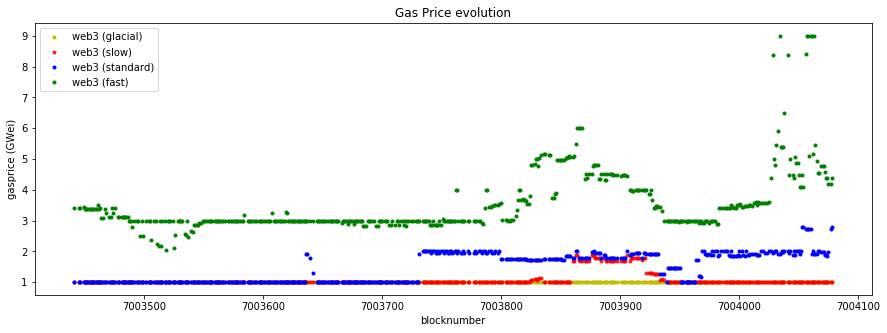

In [60]:
import matplotlib.pyplot as plt

x1 = dfweb3["block_number"].values
y1 = dfweb3["priceGweiSlow"].values

x2 = dfweb3["block_number"].values
y2 = dfweb3["priceGweiStandard"].values

x3 = dfweb3["block_number"].values
y3 = dfweb3["priceGweiFast"].values

x4 = dfweb3["block_number"].values
y4 = dfweb3["priceGweiGlacial"].values


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.scatter(x4, y4, c='y',marker='.', label='web3 (glacial)')
ax.scatter(x1, y1, alpha=0.8, c='r', marker='.', label='web3 (slow)')
ax.scatter(x2,y2, c='b', marker='.', label='web3 (standard)')
ax.scatter(x3,y3, c='g',marker='.', label='web3 (fast)')


plt.xlabel('blocknumber')
plt.ylabel('gasprice (GWei)')
plt.title('Gas Price evolution')
plt.legend(loc=2)

In [7]:
def plotHist(values, title):
    plt.figure()
    plt.hist(values, bins=20, alpha=0.6)
    plt.ylabel('Count')
    plt.xlabel('Gas Price')
    
    mean = np.mean(values)
    std = np.std(values)

    title = title + ": avg = %.2f,  std = %.2f" % (mean, std)
    plt.title(title)

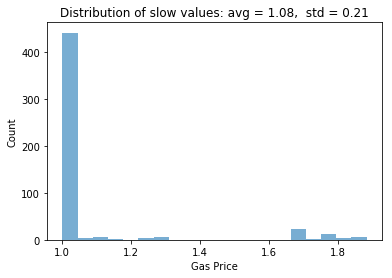

In [10]:
slow_values = dfweb3["priceGweiSlow"].values
plotHist(slow_values, "Distribution of slow values")

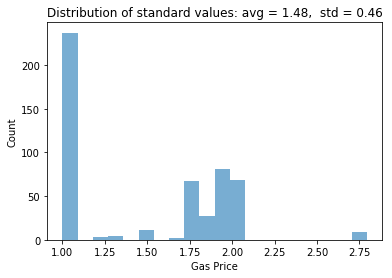

In [11]:
standard_values = dfweb3["priceGweiStandard"].values
plotHist(standard_values, "Distribution of standard values")

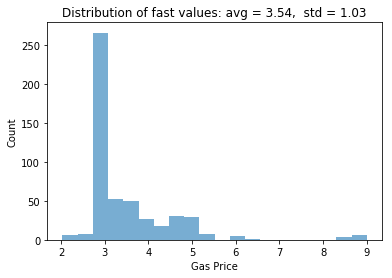

In [8]:
fast_values = dfweb3["priceGweiFast"].values
plotHist(fast_values, "Distribution of fast values")

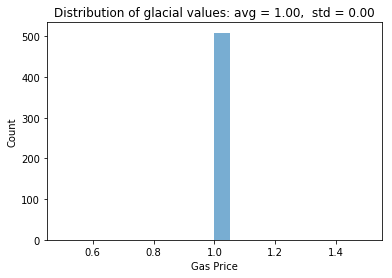

In [9]:
glacial_values = dfweb3["priceGweiGlacial"].values
plotHist(glacial_values, "Distribution of glacial values")

Text(0.5, 1.0, 'web3 minScores next 10 blocks')

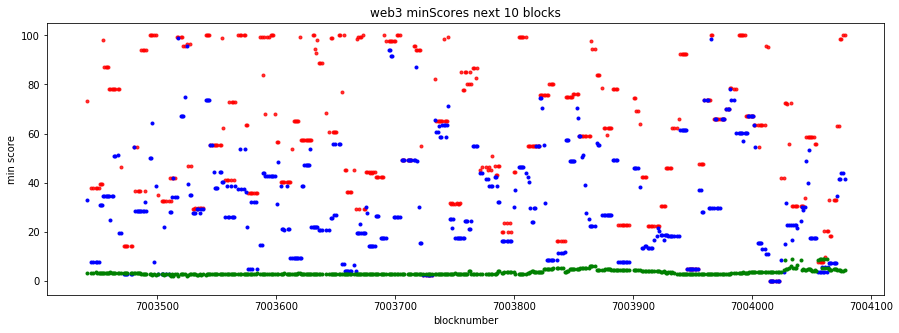

In [12]:
dfweb3["minScoreStandard"] = dfweb3[['scoreStandardPlus1','scoreStandardPlus2','scoreStandardPlus3','scoreStandardPlus4','scoreStandardPlus5','scoreStandardPlus6','scoreStandardPlus7','scoreStandardPlus8','scoreStandardPlus9','scoreStandardPlus10']].min(axis=1)
dfweb3["minScoreSlow"] = dfweb3[['scoreSlowPlus1','scoreSlowPlus2','scoreSlowPlus3','scoreSlowPlus4','scoreSlowPlus5','scoreSlowPlus6','scoreSlowPlus7','scoreSlowPlus8','scoreSlowPlus9','scoreSlowPlus10']].min(axis=1)
dfweb3["minScoreFast"] = dfweb3[['scoreFastPlus1','scoreFastPlus2','scoreFastPlus3','scoreFastPlus4','scoreFastPlus5','scoreFastPlus6','scoreFastPlus7','scoreFastPlus8','scoreFastPlus9','scoreFastPlus10']].min(axis=1)

x1 = dfweb3["block_number"].values
y1 = dfweb3["minScoreStandard"].values

x2 = dfweb3["block_number"].values
y2 = dfweb3["minScoreSlow"].values

x2 = dfweb3["block_number"].values
y2 = dfweb3["minScoreFast"].values

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.scatter(x1, y1, alpha=0.8, c='r', marker='.', label='standard')
ax.scatter(x2,y2, c='b', marker='.', label='slow')
ax.scatter(x3,y3, c='g',marker='.', label='fast')
#ax.scatter(x4, y4, c='y',marker='.', label='web3 (glacial)')

plt.xlabel('blocknumber')
plt.ylabel('min score')
plt.title('web3 minScores next 10 blocks')

4.322200392927308
1.1787819253438112


Text(0.5, 1.0, 'web3 minScores next 10 blocks')

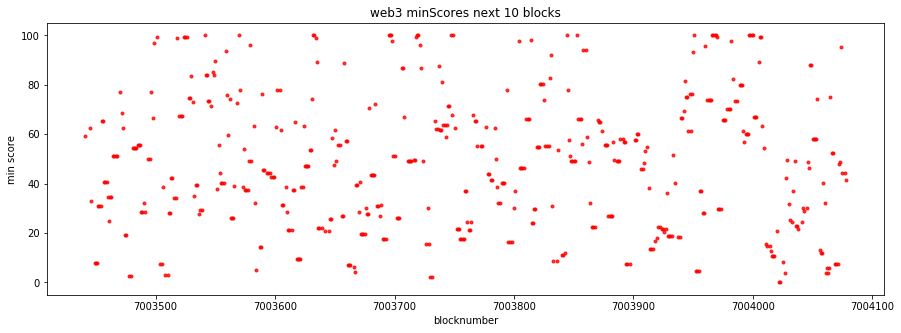

In [21]:
#assumption avg block time = 15s -> 
dfweb3["minScoreFastOneMin"] = dfweb3[['scoreFastPlus1','scoreFastPlus2','scoreFastPlus3','scoreFastPlus4']].min(axis=1)
dfweb3["minScoreFastOneMin5"] = dfweb3[['scoreFastPlus1','scoreFastPlus2','scoreFastPlus3','scoreFastPlus4','scoreFastPlus5','scoreFastPlus6']].min(axis=1)

numberOfBlocks = dfweb3["minScoreFastOneMin"].count()
numberOfBlocksWithNoInclusion = dfweb3["minScoreFastOneMin"].value_counts()[100.000]

percentage = (100 / numberOfBlocks) * numberOfBlocksWithNoInclusion
print(percentage)

numberOfBlocks5 = dfweb3["minScoreFastOneMin5"].count()
numberOfBlocksWithNoInclusion5 = dfweb3["minScoreFastOneMin5"].value_counts()[100.000]

percentage5 = (100 / numberOfBlocks5) * numberOfBlocksWithNoInclusion5
print(percentage5)

x1 = dfweb3["block_number"].values
y1 = dfweb3["minScoreFastOneMin"].values

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.scatter(x1, y1, alpha=0.8, c='r', marker='.', label='fast one min')
#ax.scatter(x4, y4, c='y',marker='.', label='web3 (glacial)')

plt.xlabel('blocknumber')
plt.ylabel('min score')
plt.title('web3 minScores next 10 blocks')

In [53]:
def getPercentage(cols):
    minScore = dfweb3[cols].min(axis=1)
    numberOfBlocks = minScore.count()
    numberOfBlocksWithoutInclusion = minScore.value_counts().get(100.000, None)
    if numberOfBlocksWithoutInclusion is None:
        numberOfBlocksWithoutInclusion = 0
    percentage = (100 / numberOfBlocks) * numberOfBlocksWithoutInclusion
    print(percentage)
    return percentage

33.59528487229862
15.127701375245579
8.055009823182711
4.322200392927308
2.5540275049115913
1.1787819253438112
0.5893909626719056
0.19646365422396855
0.0
0.0


Text(0.5, 1.0, 'web3: fast prediction \n percentage not included in next 10 blocks')

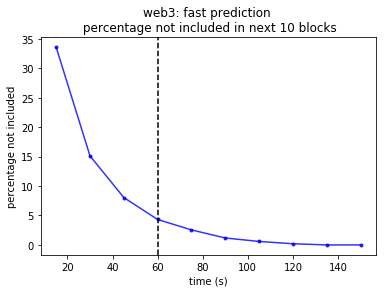

In [57]:
x = []
y = []
avg_blocktime = 15.0
cols = []
for idx in range(1, 11, 1):
    cols.append("scoreFastPlus" + str(idx))
    percentage = getPercentage(cols)
    y.append(percentage)
    x.append(idx * avg_blocktime)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y, alpha=0.8, c='b', marker='.')
plt.axvline(x=60.0, color='k', linestyle='--')

plt.xlabel('time (s)')
plt.ylabel('percentage not included')
plt.title('web3: fast prediction \n percentage not included in next 10 blocks')

81.92534381139488
67.19056974459724
55.99214145383104
46.16895874263261
38.506876227897834
33.005893909626714
27.701375245579566
23.772102161100197
19.842829076620824
16.30648330058939


Text(0.5, 1.0, 'web3: slow prediction\n percentage not included in next 10 blocks')

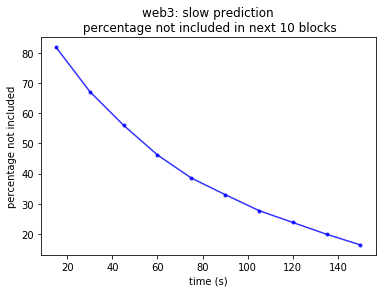

In [45]:
x = []
y = []
avg_blocktime = 15.0
cols = []
for idx in range(1, 11, 1):
    cols.append("scoreSlowPlus" + str(idx))
    percentage = getPercentage(cols)
    y.append(percentage)
    x.append(idx * avg_blocktime)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y, alpha=0.8, c='b', marker='.')

plt.xlabel('time (s)')
plt.ylabel('percentage not included')
plt.title('web3: slow prediction\n percentage not included in next 10 blocks')

72.88801571709233
54.42043222003929
40.078585461689585
30.255402750491157
22.98624754420432
18.271119842829076
14.145383104125736
11.787819253438114
9.233791748526523
7.269155206286836


Text(0.5, 1.0, 'web3: standard prediction\n percentage not included in next 10 blocks')

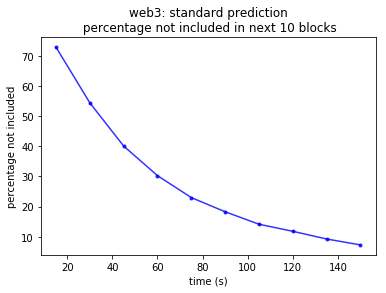

In [47]:
x = []
y = []
avg_blocktime = 15.0
cols = []
for idx in range(1, 11, 1):
    cols.append("scoreStandardPlus" + str(idx))
    percentage = getPercentage(cols)
    y.append(percentage)
    x.append(idx * avg_blocktime)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y, alpha=0.8, c='b', marker='.')

plt.xlabel('time (s)')
plt.ylabel('percentage not included')
plt.title('web3: standard prediction\n percentage not included in next 10 blocks')

87.62278978388997
75.44204322200392
65.02946954813359
55.40275049115913
47.151277013752456
40.86444007858546
34.577603143418465
30.255402750491157
25.343811394891944
20.825147347740668


Text(0.5, 1.0, 'web3: glacial prediction\n percentage not included in next 10 blocks')

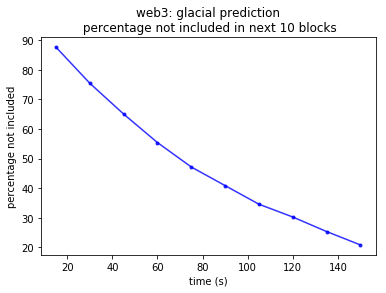

In [48]:
x = []
y = []
avg_blocktime = 15.0
cols = []
for idx in range(1, 11, 1):
    cols.append("scoreGlacialPlus" + str(idx))
    percentage = getPercentage(cols)
    y.append(percentage)
    x.append(idx * avg_blocktime)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y, alpha=0.8, c='b', marker='.')

plt.xlabel('time (s)')
plt.ylabel('percentage not included')
plt.title('web3: glacial prediction\n percentage not included in next 10 blocks')

81.92534381139488
72.88801571709233
33.59528487229862
67.19056974459724
54.42043222003929
15.127701375245579
55.99214145383104
40.078585461689585
8.055009823182711
46.16895874263261
30.255402750491157
4.322200392927308
38.506876227897834
22.98624754420432
2.5540275049115913
33.005893909626714
18.271119842829076
1.1787819253438112
27.701375245579566
14.145383104125736
0.5893909626719056
23.772102161100197
11.787819253438114
0.19646365422396855
19.842829076620824
9.233791748526523
0.0
16.30648330058939
7.269155206286836
0.0


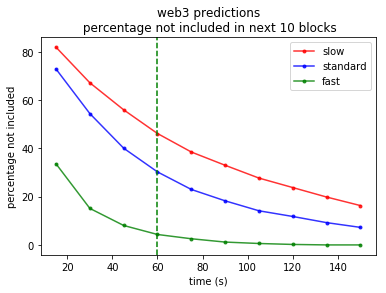

In [59]:
x1 = []
y1 = []
y2 = []
y3 = []
avg_blocktime = 15.0
colsSlow = []
colsStd = []
colsFast = []
for idx in range(1, 11, 1):
    colsSlow.append("scoreSlowPlus" + str(idx))
    colsStd.append("scoreStandardPlus" + str(idx))
    colsFast.append("scoreFastPlus" + str(idx))
    percentage1 = getPercentage(colsSlow)
    y1.append(percentage1)
    percentage2 = getPercentage(colsStd)
    y2.append(percentage2)
    percentage3 = getPercentage(colsFast)
    y3.append(percentage3)
    x1.append(idx * avg_blocktime)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x1, y1, alpha=0.8, c='r', marker='.', label='slow')
ax.plot(x1, y2, alpha=0.8, c='b', marker='.', label='standard')
ax.plot(x1, y3, alpha=0.8, c='g', marker='.', label='fast')
plt.axvline(x=60.0, color='g', linestyle='--')

plt.xlabel('time (s)')
plt.ylabel('percentage not included')
plt.title('web3 predictions\n percentage not included in next 10 blocks')
plt.legend(loc=1)